# ICN Programming Course

<p align="center">
    <img width="500" alt="image" src="https://github.com/Lenakeiz/ICN_Programming_Course/blob/main/Images/cog_neuro_logo_blue_png_0.png?raw=true">
</p>

---

## Data visualisation and matplotlib

Data visualization should be the starting point of every analysis. It's often undervalued, with the belief that statistical analysis alone is sufficient.
However, the significance of visualizing data is exemplified by [Anscome's Quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).
DCreated by Francis J. Anscombe in 1973, this consists of four datasets.
Each dataset yields identical summary statistics (mean, standard deviation, and correlation), suggesting they are similar.
Yet, when these datasets are graphically represented, their differences become apparent.
The key aspect of Anscombe's Quartet lies not in having four datasets with identical statistical properties, but in how these visually distinct datasets reveal those same properties.

Over the years more similar datasets have been created to show the importance of data visualization:
one of those is the Datasaurus dataset which urges people to "never trust summary statistics alone; always visualize your data", since, while the data exhibits normal seeming statistics, plotting the data reveals a picture of a dinosaur 🦖.
Inspired by Anscombe's Quartet, the Datasaurus you can download found in the original publication the [_datasaurus dozen_](https://dl.acm.org/doi/10.1145/3025453.3025912 
), _i.e._ 13 datasets (the Datasaurus + $12$ others) having the same summary statistics up to two decimal places.

Hence, the golden rule is the following one.
> Always find a nice way to visualise your data before going into applying the statistics.


<p align="center">
    <img width="1000" src="https://damassets.autodesk.net/content/dam/autodesk/research/publications-assets/gifs/same-stats-different-graphs/DinoSequentialSmaller.gif">
</p>

### Pandas plotting

Another great thing about pandas is that it integrates with [Matplotlib](https://matplotlib.org/) asd well as [Seaborn](https://seaborn.pydata.org/), two very important  so you get the ability to plot directly off DataFrames and Series.

To get started we need to import those libraries (make sure to have them installed first).

In [ ]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

---
## Graphical analysis

The aim is to start our data analysis using Python data visualization tools.

### Matplotlib and Seaborn

[Matplotlib](https://matplotlib.org/) is a highly customisable library, and that could come with drawbacks.
[Seaborn](https://seaborn.pydata.org/) standardises some graphical aspects and easily integrates with Pandas.

When importing seaborn as sns you can also set default options to make the plots more readable.
It is very simnple to do that by using `sns.set_theme()`.
Indeed, once that Seaborn has been imported, we can use the set function to force its default graphical settings. 

For a list of available themes you can check the [Seaborn documentation](https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles).

```python
import seaborn as sns
sns.set_theme()
```

Tricky question for you:
> Why we import Seaborn as `sns`?

<details>
    <summary><b>HINT</b></summary> 
    <p align="center">
      <a href= "https://stackoverflow.com/questions/41499857/seaborn-why-import-as-sns"><img src="https://www.thesun.co.uk/wp-content/uploads/2019/06/NINTCHDBPICT000002475114.jpg" width="350" title="Sam Norman Seaborn"></a>
    </p>
    Click on the image for a little bit more detailed answer.
</details>

#### Import data

Let's start by import movie dataset and plot the relationship between `ratings` and `revenue`. 
All we need to do is call `plot()` on df with some info about how to construct the plot.

In [ ]:
data_url = 'https://raw.githubusercontent.com/LearnDataSci/articles/master/Python%20Pandas%20Tutorial%20A%20Complete%20Introduction%20for%20Beginners/IMDB-Movie-Data.csv'

df = pd.read_csv(data_url)
df.head()

To plot our output is very easy now that we have imported Matplotlib. In fact we will now have an extension method for the class dataframe called `plot`. The function works as a a wrapper around Matplotlib's plotting functions as it is able to print different `kind` of plots. You can use it on Dataframes or a Series (an individual column of a dataframe).

In [ ]:
df.plot(kind='scatter', x='Rating', y='Revenue (Millions)', 
    title = "Revenues vs Rating", figsize=(12,8));

Pandas' `plot` function has many optional arguments.

Some of these arguments are linked to Matplotlib properties. 
A complete list of such properties can be found [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

While some of these properties might be never of use, some of them are quite useful like `marker` and `color` ones.

In [ ]:
df.plot(kind='scatter', 
    x='Rating', 
    y='Revenue (Millions)', 
    title = "Revenues vs Rating",
    marker='x',
    color='r',
    figsize=(12,8));

Since `plot` works on the series or dataframe objects, we can still apply of the pandas functions that return dataframes before going into the plotting part. So for instance we can do filtering besed on director names.

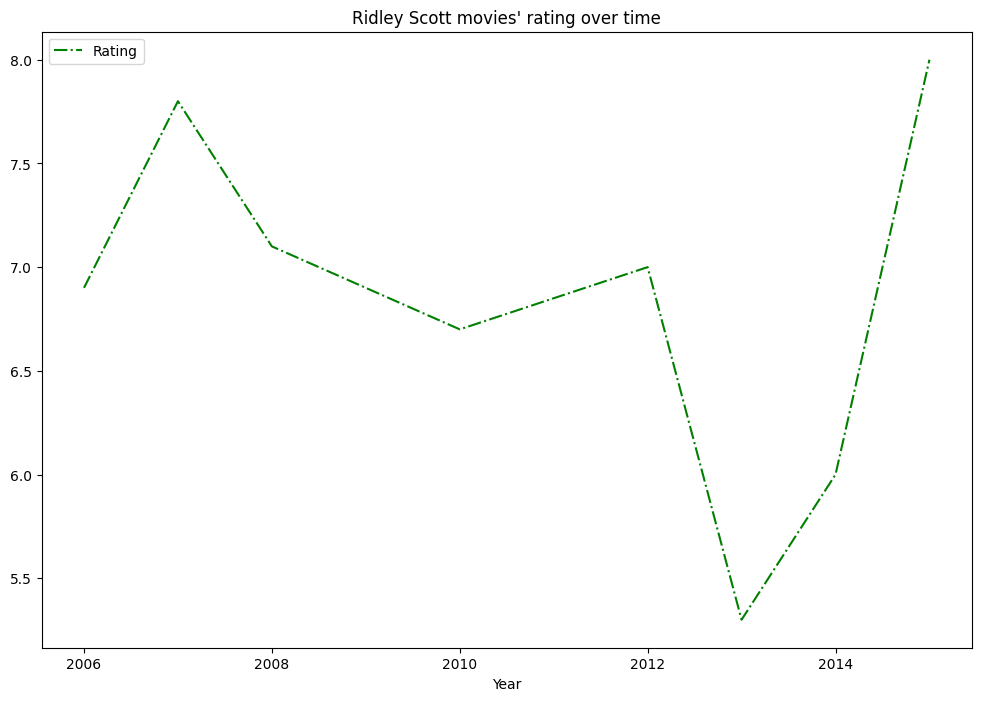

In [11]:
mask = df['Director'].str.contains('ridley scott', case=False, na=False)
df[mask].sort_values(by="Year").plot(x="Year",
                                            y="Rating",
                                            linestyle="-.",
                                            title="Ridley Scott movies' rating over time",
                                            color='g',
                                            figsize=(12,8));

Pay attention how we added an extra care in dealing with case sensitive. This can be true when dealing with datasets for which the data is input manually by different sources 
Luckily we can solve the problem by using string functions and doing alternative ways for querying the dataframe.

### Histograms

If we want to plot a simple Histogram based on a single column, we can call plot on the column series.

<Axes: title={'center': 'Rating'}, ylabel='Frequency'>

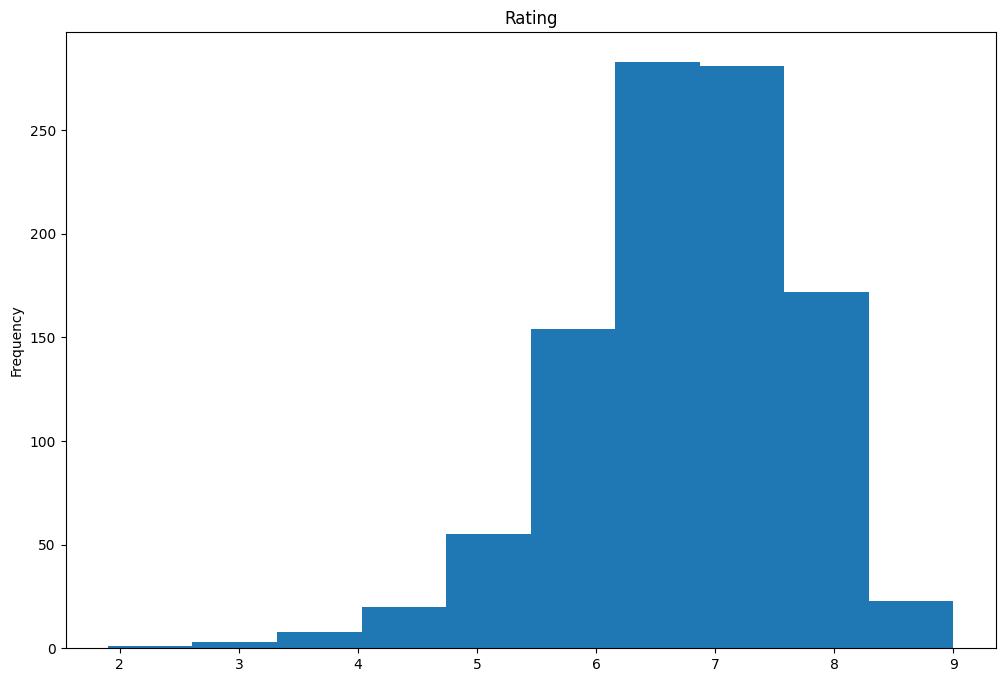

In [13]:
df['Rating'].plot(kind='hist', title='Rating', figsize=(12,8))

We can also make a graphical representation using the interquartile range, the famous __Boxplot__. Let's first recall what `describe` gives us on the ratings column.

In [14]:
df.Rating.describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: Rating, dtype: float64

Using a Boxplot we can visualize this data.

<Axes: >

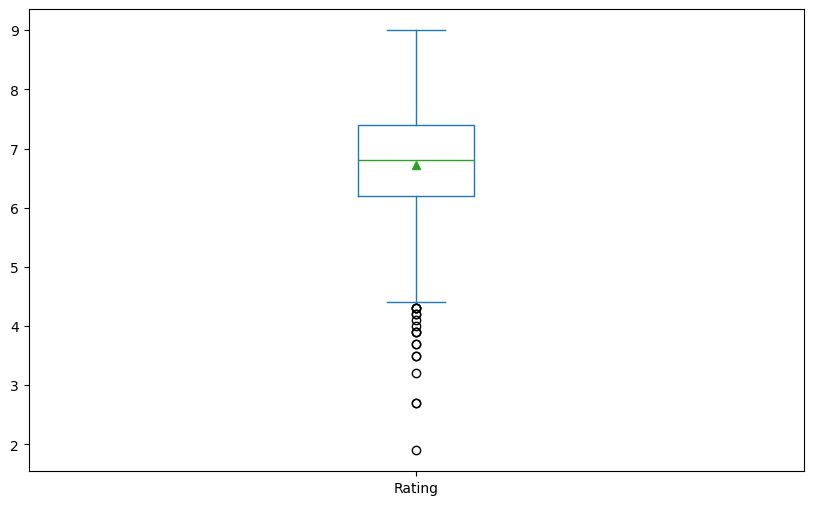

In [16]:
df['Rating'].plot(kind="box",
                figsize=(10,6),
                showmeans=True
                )

To have a brief summary, one can have a look at the picture below.

<p align="center">
    <img width="1200" src="https://media.geeksforgeeks.org/wp-content/uploads/20250711164220858791/Box-Plot_final.webp">
</p>

By combining categorical and continuous data, we can create a Boxplot of revenue that is grouped by a Rating Category.

In [17]:
# Create rating category column
df["rating_category"] = df.Rating.apply(lambda x: 'good' if x>= 8.0 else 'bad')
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,rating_category
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,bad
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,bad
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,bad


You can use the pandas boxplot or the seaborn one. They are equivalent.

The advantage of seaborn is that the `groupby` is hidden by the boxplot, and the code is slightly more compact.

<Axes: xlabel='rating_category', ylabel='Revenue (Millions)'>

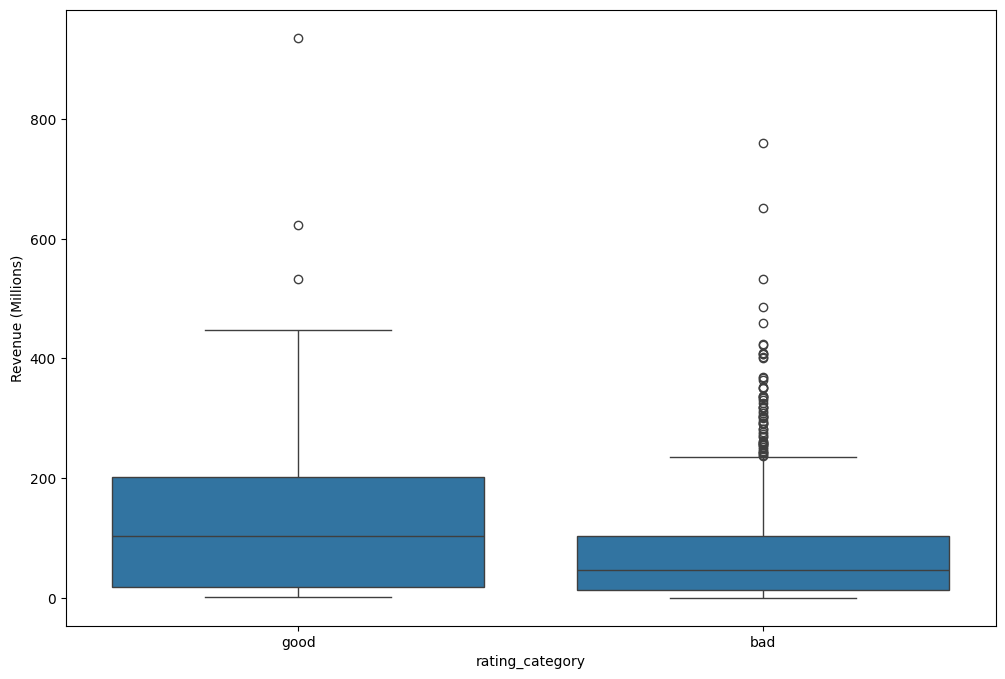

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df["rating_category"],
            y=df['Revenue (Millions)'],
            data=df)

#### A quick reminder for good plotting

Always label your axis!

<p align="center">
    <img width="689" src="https://raw.githubusercontent.com/qingkaikong/blog/master/2017_12_machine_learning_funny_pictures/figures/figure_20.png">
</p>

---

Once we understand how we can chain different operations and how Pandas, we can start to do more interesting queries to our data. Let s assume we are interested only in movies whose revenue more than $150$ million, sort them by rating, change good/bad threshold to `7.0` for `rating_category` and build an histogram for each rating category.

<Axes: xlabel='Rating', ylabel='Count'>

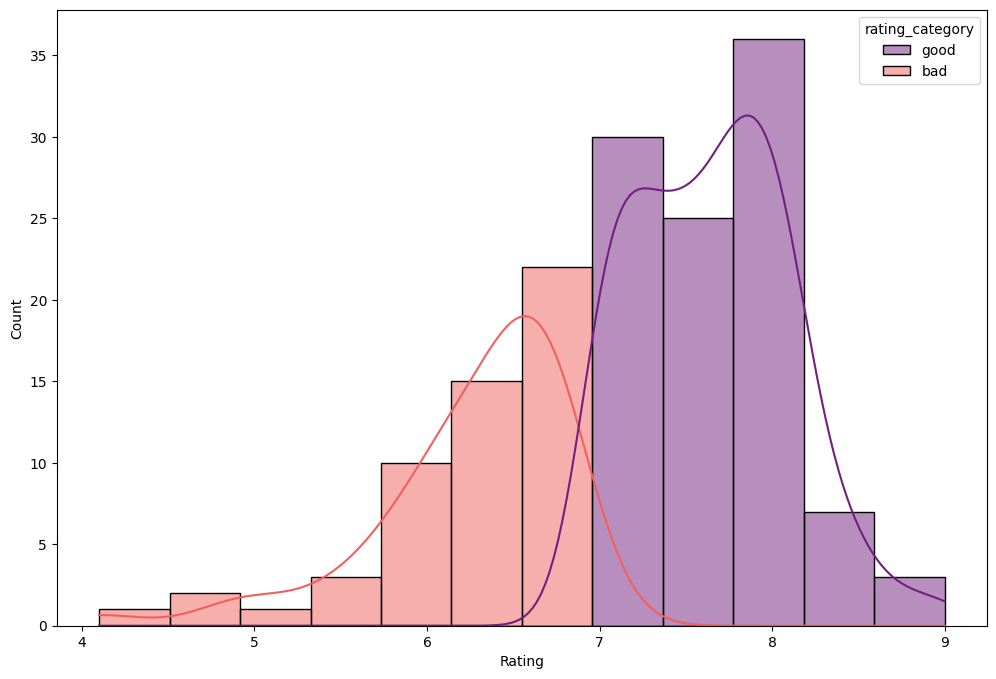

In [19]:
df_high_revenue = df[df["Revenue (Millions)"] > 150].sort_values(by="Rating", ascending=False)
df_high_revenue["rating_category"] = df_high_revenue["Rating"].apply(lambda x: 'good' if x >= 7.0 else 'bad')
plt.figure(figsize=(12, 8))
sns.histplot(
    data=df_high_revenue,
    x="Rating",
    hue="rating_category",
    bins="auto",
    palette="magma",
    kde=True
)

Another question is looking at how the rating change over the years. We can do this my producing a boxplot for visualising the rating grouped by release year. For doing so we can use Seaborn and its ability to perform grouping "behind the scenes".

<Axes: xlabel='Year', ylabel='Rating'>

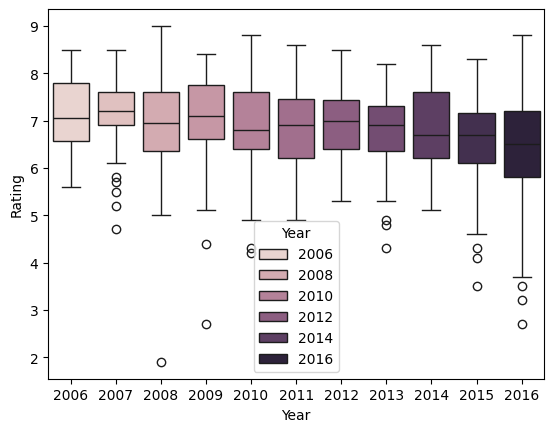

In [ ]:
sns.boxplot(y='Rating', x='Year', data=df)

Let s go further by looking at the IMDB movie dataset and let s do more exploratory analysis.
We can answers to questions like

1. Can we select all movies within a genre (_e.g._ Sci-Fi) and analyze the annual trend in terms of quantity of movies produced, commercial success and appreciation?
2. What s the relation between metacritic and rating?

#### Using meaningful column names
Before proceding on, it is important to rename columns to make them easier to be used for filtering.
Let's rename columns.

In [ ]:
df = df.rename(columns={
    'Runtime (Minutes)': 'Runtime',
    'Revenue (Millions)': 'Revenue_millions'
})
df.columns = [col.lower() for col in df]
df.head()

#### Users and critics ratings

The user rating is store in column `ratings`, while the critic one in `metascore`.
In principle we can study the difference between these two.
However they are not on the same scale as ratings goes from $\left[0,10 \right]$ and metascore goes from $\left[0,100 \right]$.
We have two choices here: 
1. Rescale one to the other, if we know the conversion rate.
2. Rescale both on the interval $\left[0,1 \right]$.

we are going to the second choice here.

In [ ]:
# A compact way to do so is the following
df[['rating', 'metascore']] -= df[['rating', 'metascore']].min() # subtract the min, such that the new min is 0
df[['rating', 'metascore']] /= df[['rating', 'metascore']].max() # divide by the max, such that the new max is 1
df[['rating', 'metascore']].head()

We can now evaluate the difference and save it into a new column

In [ ]:
df["score_difference"] = df["metascore"] - df["rating"] # abs here is optional, depending what you wanna see.

To start with our exploratory analysis, a good strategy might be plotting some of the quantities into account, specifically `rating`, `metascore` and their difference.
Recall they are on the same scale, so nothing further to worry about!

In [ ]:
genre = "Horror"
df[df.genre.str.contains(f"{genre}")].plot(kind='bar', 
                                        x = 'title', 
                                        y = 'rating', 
                                        title= f"{genre} Movies user rating",
                                        figsize=(25,8)); # We plot just one genre for the sake of visualisation clarity.

And we can do the same for the metascore

In [ ]:
genre = "Horror"
df[df.genre.str.contains(f"{genre}")].plot(kind='bar', 
                                        x = 'title', 
                                        y = 'metascore', 
                                        title= f"{genre} Movies critics rating",
                                        figsize=(25,8)); # We plot just one genre for the sake of visualisation clarity.

And finally also our calculated value, the difference approval

In [ ]:
genre = "Horror"
df[df.genre.str.contains(f"{genre}")].plot(kind='bar', 
                                        x = 'title', 
                                        y = 'score_difference', 
                                        title= f"{genre} Movies score difference between critics and users",
                                        figsize=(25,8)); # We plot just one genre for the sake of visualisation clarity.

One can immediately see that the critics is on average more strict than the users about movies, with some noteworthy exceptions.

#### Analysis of the annual trend of a specific genre movie in terms of quantity of films produced, commercial success and appreciation

We are going to visualise results for "Sci-Fi" movies, however, let's try to keep the genre-choice parametric so that we can easily explore another genre without re-writing any code.

_In fact_: [Laziness](https://medium.com/@tsecretdeveloper/a-good-coder-is-a-lazy-coder-a678eb56d373) is a good characteristic of good programmers

First of all let's plot the number of movies in the genre over years.

In [ ]:
genre_to_select = "Sci-Fi"

df_genre = df[df["genre"].str.contains(genre_to_select)]
df_genre[["year", "director"]].groupby(by=["year"]).count().plot(linestyle="-.",
                                                                color="b",
                                                                figsize=(12, 8),
                                                                title=f"Number of {genre_to_select} movies over time")


This is a nice plot, but maybe we can do the same by couting the number of occurences in categorical variables. We can do this by using `coutplot` from Seaborn

In [ ]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(12,8))
sns.countplot(x = "year", hue="year", legend=False, data = df_genre, palette="pastel")
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.title(f"Number of {genre_to_select} movies over time")
plt.tight_layout()
plt.show()

Let s not look at the trend of of `metascore` and `rating` over time for this genre.

In [ ]:
df_genre[["year", "metascore", "rating"]].groupby("year")[["metascore", "rating"]].mean().plot(figsize=(20, 10), title=f"Average ratings over time for {genre_to_select} movies")

It s seems that there may be a correlation between the two scores.
Let s try to explore that further.
One can use the `corr` method in pandas.
By default the pearson correlation index is used, the method can be changed via the method parameter

In [ ]:
grouped_data = df_genre.groupby("year")[["metascore", "rating"]].mean()

# Calculate the correlation matrix
correlation_matrix = grouped_data.corr()
correlation_matrix

Let s visualize this correlation by creating a scatter plot between the two variables.
This time we are going to work on the dataframe extracted from the genre directly.

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="rating", y="metascore", data=df_genre)
plt.tight_layout()
plt.grid()

Let s see if other variables are correlated.
For this part we are going to use the entire database.
For example is the lenght of the movie an indication that it may be more or less appreciated?

In [ ]:
df[["runtime", "metascore", "rating"]].corr()

Does not seem so.
One can visualize the correlation coefficients with with an heatmap.
Seaborn comes again handy with this.

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[["runtime", "metascore", "rating"]].corr(), annot=True)
plt.tight_layout()

Now let s see if the revenue correlates with the level of appreciation of the movue.
We can do that by creating a score that takes into account `metacritic` and `rating`

In [ ]:
df["mean_score"] = (df["metascore"] + df["rating"]) / 2 # mean of the two scores
df[["mean_score", "metascore", "rating"]].head()

# plotting the correlation between mean score and revenue
plt.figure(figsize=(12, 8))
sns.heatmap(df[["mean_score", "revenue_millions"]].corr(), annot=True)
plt.tight_layout()

Really not much correlated.
This will be also clear when plotting the scatterplot.

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="mean_score", y="revenue_millions", data=df)
plt.tight_layout()
plt.grid()

There are plenty of movies with low revenue and still very much appreciated.

On the other hands, the revenue is correlated with the number of votes the movie got in the IMDB platform.

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[["votes", "revenue_millions"]].corr(), annot=True)
plt.tight_layout()

plt.figure(figsize=(12, 8))
sns.scatterplot(x="revenue_millions", y="votes", data=df)
plt.tight_layout()
plt.grid()
plt.show()

So far we have tried to look at specific correlation based on assumptions we have on our dataset.
Sometimes it can be very convenient to visualise correlation plots between each coupled variables. 
Wwe can do this in Seaborn by using the powerful `pairplot`.
It will take some time 

In [ ]:
sns.pairplot(df)

Finally we can look the continuos variiables to check their distribution. 
THis can be done easily by using displot.

In [ ]:
# looking at the distribution of revenue
sns.set_theme()
sns.displot(
    data=df, kind="hist", kde=True,
    x="revenue_millions",  height=8, aspect=1.5)

### Boxplot or Violin plot
We can check for distributions and outliers of variables with boxplot and violin plot.

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="year", hue="year", y="revenue_millions", palette="pastel", data=df)
plt.tight_layout()

plt.figure(figsize=(12, 8))
sns.violinplot(x="year", hue="year", y="revenue_millions", palette="pastel", data=df)
plt.tight_layout()

We can also use the `hue` parameter to add levels of discrimination to other type of plots.

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="rating", y="metascore", hue="year", data=df, palette="pastel")
plt.tight_layout()
plt.grid()

In [ ]:
sns.displot(
    data=df, kind="hist", kde=True,
    x="mean_score", hue="year", palette='pastel', height=10, aspect=1.5)